## Observations and Insights 

In [34]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
merge_mouse_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_mouse_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice.


number_mice = merge_mouse_data_df["Mouse ID"].nunique()
                                  
print("Total number of mice " + str(number_mice))


Total number of mice 249


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [37]:
# Optional: Get all the data for the duplicate mouse ID. 


duplicated_mouse = merge_mouse_data_df[merge_mouse_data_df.duplicated(subset=(['Mouse ID','Timepoint']),keep=False)]

duplicated_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data_df = merge_mouse_data_df.loc[merge_mouse_data_df['Mouse ID'] != "g989"]
clean_mouse_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.

Clean_number_of_mice = clean_mouse_data_df['Mouse ID'].nunique()
print(" Total Number of Mice " + str(Clean_number_of_mice))



 Total Number of Mice 248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df = clean_mouse_data_df.groupby(["Drug Regimen"])

# Mean = grouped_df["Tumor Volume (mm3)"].mean()
# Median = grouped_df["Tumor Volume (mm3)"].median()
# Standard_Deviation = grouped_df["Tumor Volume (mm3)"].std()
# Variance = grouped_df["Tumor Volume (mm3)"].var()

Summary_df = pd.DataFrame({"Mean":grouped_df["Tumor Volume (mm3)"].mean(),
                          "Median":grouped_df["Tumor Volume (mm3)"].median(),
                          "Std" : grouped_df["Tumor Volume (mm3)"].std(),
                          "Variance":grouped_df["Tumor Volume (mm3)"].var(),
                          "SEM":grouped_df["Tumor Volume (mm3)"].sem()})


Summary_df

,Mean,Median,Std,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summary_agg  = grouped_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
                             
Summary_agg                              

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

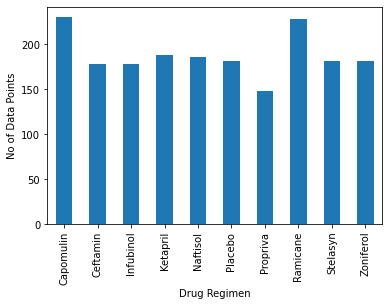

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group_df = clean_mouse_data_df.groupby("Drug Regimen")
count_drug_regimen = drug_group_df["Drug Regimen"].count()
drug_chart = count_drug_regimen.plot(kind = 'bar')
plt.ylabel("No of Data Points")
plt.xlabel("Drug Regimen")
plt.show()


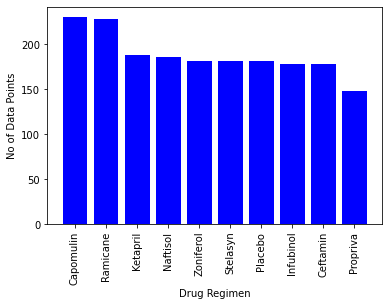

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#plt.bar(x_axis, bars_in_cities, color="b", align="center")
# plt.bar(clean_mouse_data_df["Drug Regimen"].,clean_mouse_data_df["Drug Regimen"].value_counts(),color = 'b',align = "center")
# plt.show()
plt.bar(clean_mouse_data_df["Drug Regimen"].value_counts().index, clean_mouse_data_df["Drug Regimen"].value_counts() , color = "b")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("No of Data Points")
plt.show()
plt.tight_layout()

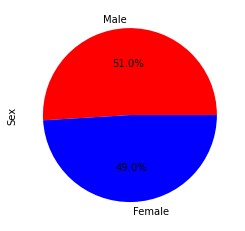

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["red", "blue"]
labels = ["Male","Female"]
sizes = clean_mouse_data_df["Sex"].value_counts()
plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

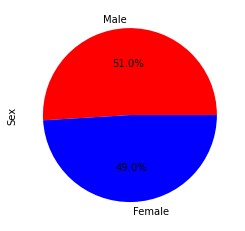

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_distribution = sizes.plot.pie(autopct="%1.1f%%",labels = labels ,colors = colors)
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_df = clean_mouse_data_df.groupby(['Mouse ID'])['Timepoint'].max()
max_df = max_df.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
merged_df = max_df.merge(clean_mouse_data_df,on = ['Mouse ID','Timepoint'])

merged_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [47]:
merged_df.columns


Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [48]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
        drug_vol = merged_df.loc[merged_df["Drug Regimen"]== treatment,["Tumor Volume (mm3)"]]
#         print(tumor_data)
                                 
        
        tumor_data.append(drug_vol["Tumor Volume (mm3)"])
        
        quartiles = drug_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq # intequartilerange

        print(f"The lower quartile of Tumor Volume is: {lowerq}")
        print(f"The upper quartile of Tumor Volume is: {upperq}")
        print(f"The interquartile range of Tumor Volume is: {iqr}")
        print(f"The the median of Tumor Volume is: {quartiles[0.5]} ") 
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset 
    
print(tumor_data)
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Tumor Volume is: 48.72207785
The upper quartil

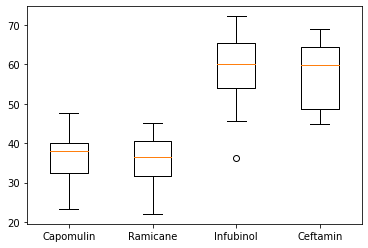

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1 ,ax1 = plt.subplots()

# ax1.set_ylabel('Final Tumor Volume')
# ax1.boxplot(tumor_data ,labels = treatments)
# plt.show()

plt.boxplot(tumor_data,labels = treatments)
plt.show()
#print(tumor_data)

## Line and Scatter Plots

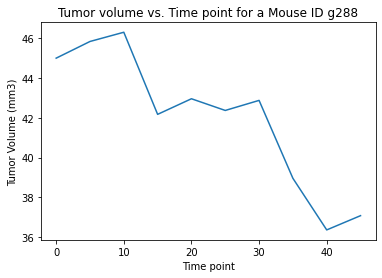

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_df = clean_mouse_data_df.loc[clean_mouse_data_df['Mouse ID'] == "g288"]
mouse_df
x_axis_Timepoint = np.arange(0,50,5)
x_axis_Timepoint
y_axis = mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis_Timepoint, y_axis)
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs. Time point for a Mouse ID g288")
plt.show()


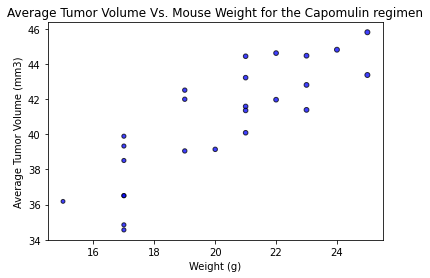

          Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Mouse ID                                                          
b128             9.0        22.0       22.5           41.963636   
b742             7.0        21.0       22.5           40.083699   
f966            16.0        17.0       10.0           36.505973   
g288             3.0        19.0       22.5           41.990097   
g316            22.0        22.0       22.5           44.613344   
i557             1.0        24.0       22.5           44.805810   
i738            23.0        20.0       22.5           39.141053   
j119             7.0        23.0       22.5           44.465236   
j246            21.0        21.0       17.5           43.216925   
l509            17.0        21.0       22.5           44.434474   
l897            17.0        19.0       22.5           42.507261   
m601            22.0        17.0       22.5           34.847470   
m957             3.0        19.0       22.5           39.04981

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_only_df = clean_mouse_data_df.loc[clean_mouse_data_df["Drug Regimen"] == "Capomulin"]
capomulin_only_df
capomulin_only_group_df = capomulin_only_df.groupby(['Mouse ID']).mean()
capomulin_only_group_df 
x_axis = capomulin_only_group_df['Weight (g)']
data = capomulin_only_group_df['Tumor Volume (mm3)']
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume Vs. Mouse Weight for the Capomulin regimen")
plt.show()
print(capomulin_only_group_df)


## Correlation and Regression

The correlation between both factors is 0.84


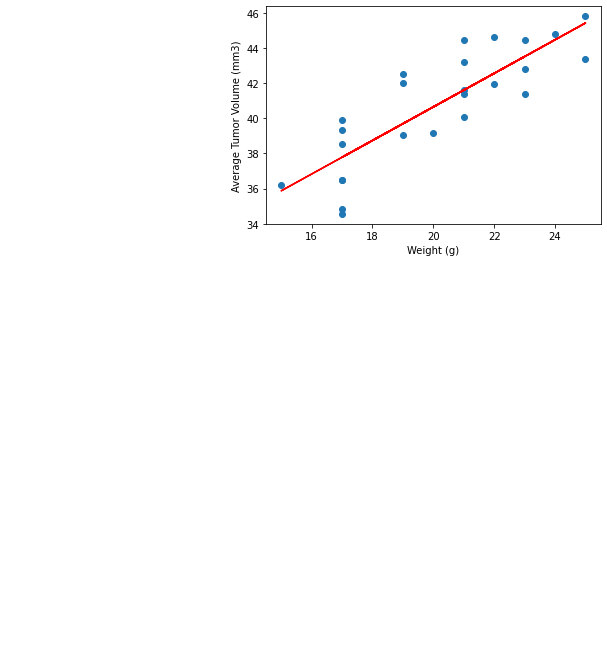

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = capomulin_only_group_df.iloc[:,1]
average_tumor = capomulin_only_group_df.iloc[:,3]
correlation = st.pearsonr(weight,average_tumor)
plt.scatter(weight,average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,average_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()




